In [14]:
# Import packages
import numpy as np
import scipy as sp
from scipy import stats, optimize, interpolate

In [21]:
# Initiate variables
Observed = np.array([[72, 96, 32], [50, 100, 50]])
times = 100000
genotype = ["AA"]*122 + ["AB"]*196 + ["BB"]*82
case_control = [1]*200 + [0]*200
chi_score = np.zeros((times, 3))

In [4]:
def get_additive(permutation):
    
    addi = np.zeros((2, 2))
    for i in range(len(permutation)):
        for j in range(len(permutation[i])):
            if j == 0:
                addi[i][j] = 2* permutation[i][j] + permutation[i][j+1]
            if j == 2:
                addi[i][j-1] = 2* permutation[i][j] + permutation[i][j-1]
                
    return addi

In [5]:
def get_dominant(permutation):
    
    domi = np.zeros((2, 2))
    for i in range(len(permutation)):
        for j in range(len(permutation[i])):
            if j == 0:
                domi[i][j] = permutation[i][j] + permutation[i][j+1]
            if j == 2:
                domi[i][j-1] = permutation[i][j]
                
    return domi

In [6]:
def get_recessive(permutation):
    
    resc = np.zeros((2, 2))
    for i in range(len(permutation)):
        for j in range(len(permutation[i])):
            if j == 0:
                resc[i][j] = permutation[i][j]
            if j == 2:
                resc[i][j-1] = permutation[i][j] + permutation[i][j-1]
                
    return resc

In [7]:
def get_pvalue(chi_score_max, chi_score_ori):
    
    count = 0
    for i in chi_score_max:
        if i > chi_score_ori:
            count += 1
            
    return count/len(chi_score_max)

In [8]:
def get_permutation(genotype,case_control):
    
    case_control_shuffle = np.random.permutation(case_control)
    AA_case = AB_case = BB_case = AA_control = AB_control = BB_control = 0
    
    for i in range(len(genotype)):
        if genotype[i] == "AA" and case_control_shuffle[i] == 1:
            AA_case += 1
        if genotype[i] == "AB" and case_control_shuffle[i] == 1:
            AB_case += 1
        if genotype[i] == "BB" and case_control_shuffle[i] == 1:
            BB_case += 1
        if genotype[i] == "AA" and case_control_shuffle[i] == 0:
            AA_control += 1
        if genotype[i] == "AB" and case_control_shuffle[i] == 0:
            AB_control += 1
        if genotype[i] == "BB" and case_control_shuffle[i] == 0:
            BB_control += 1
            
    return [[AA_case, AB_case, BB_case],[AA_control, AB_control, BB_control]]

In [22]:
# Main program
for i in range(int(times)):
    
    # Permute the original table
    permutation = get_permutation(genotype,case_control)

    # Get additive chi_score
    add = get_additive(permutation)    
    chi_score[i][0] = sp.stats.chi2_contingency(add)[0]
    
    # Get dominant chi_score
    dom = get_dominant(permutation)  
    chi_score[i][1] = sp.stats.chi2_contingency(dom)[0]

    # Get recessive chi_score
    res = get_recessive(permutation)
    chi_score[i][2] = sp.stats.chi2_contingency(res)[0]
    
# Calculate max chi_score for each permutation
chi_score_max = np.amax(chi_score, axis = 1)

# Calculate original chi_score for original data
chi_score_ori = max(sp.stats.chi2_contingency(get_additive(Observed))[0],sp.stats.chi2_contingency(get_dominant(Observed))[0],sp.stats.chi2_contingency(get_recessive(Observed))[0])

# Calculate p_value
p_value = get_pvalue(chi_score_max, chi_score_ori)

print(p_value)

0.00897


(array([4.1489e+04, 2.0874e+04, 1.1986e+04, 8.0910e+03, 4.8770e+03,
        4.6500e+03, 3.0620e+03, 1.2090e+03, 1.1430e+03, 7.4500e+02,
        5.7600e+02, 4.0100e+02, 3.0100e+02, 1.4900e+02, 1.4400e+02,
        1.1400e+02, 5.6000e+01, 3.8000e+01, 1.7000e+01, 3.9000e+01,
        0.0000e+00, 1.6000e+01, 9.0000e+00, 2.0000e+00, 5.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([ 0.        ,  0.66084837,  1.32169674,  1.98254511,  2.64339348,
         3.30424185,  3.96509022,  4.62593859,  5.28678696,  5.94763533,
         6.6084837 ,  7.26933208,  7.93018045,  8.59102882,  9.25187719,
         9.91272556, 10.57357393, 11.2344223 , 11.89527067, 12.55611904,
        13.21696741, 13.87781578, 14.53866415, 15.19951252, 15.86036089,
        16.52120926, 17.18205763, 17.842906  , 18.50375437, 19.16460274,
        19.82545111]),
 <a list of 30 Patch objects>)

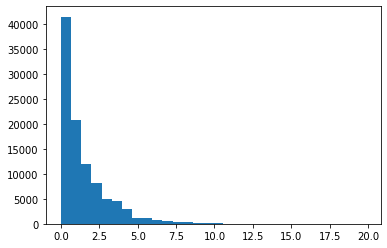

In [35]:
# Plot max chi_score, just for fun.
import matplotlib.pyplot as plt
plt.hist(chi_score_max, bins = 30)